In [79]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Привести инверсию по каждому цветовому каналу

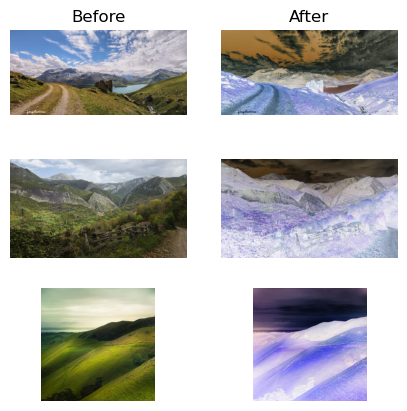

In [80]:
""""create to column before and after"""

num_img = 3

fig, ax = plt.subplots(num_img, 2, figsize = (5, 5))
ax[0,0].set_title("Before")
ax[0,1].set_title("After")

for i in range(num_img):

  img = plt.imread(f"Images/Image{i+1}.jpg")

  reverse_img = 255 - img
  ax[i,0].imshow(img)
  ax[i,0].axis('off')

  ax[i,1].imshow(reverse_img)
  ax[i,1].axis('off')


plt.show()
     

In [81]:
#Variable	Definition	Key 
#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger fare	
#cabin	Cabin number	
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [82]:
df_train = pd.read_csv('dataset/train.csv')
df_train



union_df = df_train
union_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
union_df.shape

(891, 12)

In [84]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
union_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [114]:
"""how many did survived"""

survived = count_survived = union_df["Survived"].sum()
f"{survived} is survived"

'342 is survived'

In [107]:
f"{union_df['Cabin'].count()} - people which had a cabin"

'204 - people which had a cabin'

In [87]:
"""percentage of empty cells in a column"""

NAN_values = [(col, union_df[col].isna().mean()*100) for col in df_train]
NAN_values = pd.DataFrame(NAN_values, columns=['column_name', 'percent'])
NAN_values = NAN_values[NAN_values["percent"] > 0]
NAN_values.sort_values("percent", ascending=False)

,column_name,percent
10,Cabin,77.104377
5,Age,19.865320
11,Embarked,0.224467


In [88]:
"""how match peple survived by port"""

union_df[union_df['Age'].notna()].groupby(['Sex', 'Embarked']).agg({'Age': 'mean', 'Survived': [sum]}).reset_index()

,Sex,Embarked,Age,Survived
,,,mean,sum
0,female,C,28.344262,55
1,female,Q,24.291667,7
2,female,S,27.771505,133
3,male,C,32.998841,24
4,male,Q,30.937500,1
5,male,S,30.291440,68


In [98]:
union_df[union_df['Age'].notna()].groupby(['Sex']).agg({'Age': 'mean', 'Survived': [sum]}).reset_index()

,Sex,Age,Survived
,,mean,sum
0,female,27.915709,197
1,male,30.726645,93


In [99]:
"""Age of passenger"""

union_df[union_df['Age'].notna()].groupby(['Sex']).agg({'Survived': np.mean, 'Age': [max,min, np.mean]}).reset_index()

Sex  Survived   Age                 
               mean   max   min       mean
0  female  0.754789  63.0  0.75  27.915709
1    male  0.205298  80.0  0.42  30.726645

In [ ]:
"""how many was on a Titanic"""

union_df['Person'] = union_df.Sex
union_df.loc[union_df['Age'] < 18, 'Person'] = 'Child'
print(f"Category of people {union_df.Person.value_counts().reset_index()}")

Category of people     index  Person
0    male     519
1  female     259
2   Child     113


In [94]:
"""mean age survived people by class"""

union_df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [ ]:
"""mean age survived people by Embarked"""

union_df[['Embarked', 'Survived', 'Age']].groupby(['Embarked']).mean().reset_index()

,Embarked,Survived,Age
0,C,0.553571,30.814769
1,Q,0.389610,28.089286
2,S,0.336957,29.445397


In [101]:
"""average ticket price"""

union_df.groupby(["Pclass"])["Fare"].mean().reset_index()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [121]:
union_df["Fare"].mean()

32.204207968574636

In [ ]:
"""cut data by comma -> Surname"""

union_df['SurName'] = union_df['Name'].apply(lambda x: x.split(',')[0])
union_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,SurName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Behr


In [ ]:
union_df['Family_Size'] = union_df['SibSp'] + union_df['Parch'] 
union_df[(union_df['Family_Size'] > 1) & (union_df['SurName'] == 'Rice')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,SurName,Family_Size
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,Child,Rice,5
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q,Child,Rice,5
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q,Child,Rice,5
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q,Child,Rice,5
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q,female,Rice,5


In [ ]:
"""families with more then 1 person"""

families = union_df.groupby(['SurName', 'Ticket']).filter(lambda x: len(x) > 1)
families

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,SurName,Family_Size
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Futrelle,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,Palsson,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,Johnson,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,Nasser,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Child,Sandstrom,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,Child,Johnson,2
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female,Beckwith,2
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,female,Abelson,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,female,Rice,5


In [ ]:
"""number of families"""

families['Family_Size'] = families['SibSp'] + families['Parch']

all_families = families[(families['Family_Size'] != 0)][['Ticket']]
count_families = all_families.groupby(['Ticket']).ngroups # cumcount

f"number of families: {count_families}"

'number of families: 97'

In [ ]:
families[['SurName', 'Ticket', 'Family_Size', 'Survived']].groupby('SurName').filter(lambda x: len(x) > 1)

,SurName,Ticket,Family_Size,Survived
3,Futrelle,113803,1,1
7,Palsson,349909,4,0
8,Johnson,347742,2,1
9,Nasser,237736,1,1
10,Sandstrom,PP 9549,2,1
...,...,...,...,...
869,Johnson,347742,2,1
871,Beckwith,11751,2,1
874,Abelson,P/PP 3381,1,1
885,Rice,382652,5,0


In [ ]:
"""number of families which survived (man approximately 2 or more men in the  family)"""

survived_families = families.pivot_table(index= ['Ticket'], aggfunc= np.sum).reset_index()
survived_families = survived_families[survived_families['Survived'] > 1]
f"number of families which survived {len(survived_families.Ticket.unique())} "
#survived_families[survived_families['Survived']>1].pivot_table(index= ['Ticket']).reset_index()

'number of families which survived 44 '

In [ ]:
"""check """

s = families.pivot_table(index= ['Ticket'], aggfunc= np.sum).reset_index()
ss = s[s.Survived > 1]
len(pd.unique(ss.Ticket))

44

In [ ]:
union_df.query('SurName == ["Braund"]')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,SurName,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Braund,1
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S,male,Braund,1


In [ ]:
"""number of couples"""

couples = union_df[(union_df['SibSp'] == 1) & (union_df['Parch'] == 0)].groupby('SurName').filter(lambda x: 3 > len(x) > 1)
count_couples = couples.groupby(['SurName', 'Ticket']).ngroups

f"number of couples: {int(count_couples)}"

'number of couples: 39'

In [ ]:
"""number of couples which survived"""

survived_couples = couples.pivot_table(index= ['Ticket'], aggfunc= np.sum).reset_index()
survived_couples = survived_couples[survived_couples['Survived'] > 1]

f"number of couples which survived {int(len(survived_couples.Ticket.unique()))} "

'number of couples which survived 11 '

In [ ]:
"""check """

s = couples.pivot_table(index= ['Ticket'], aggfunc= np.sum).reset_index()
ss = s[s.Survived > 1]
len(pd.unique(ss.Ticket))

11

In [ ]:
"""number of P/A"""

parents_children = union_df.groupby(['SurName', 'Ticket']).filter(lambda x: max(x['Age']) - min(x['Age']) > 18)

f"number of parents with child: {len(parents_children['Ticket'].unique())}"

'number of parents with child: 47'

In [117]:
"""number of couples which survived (man approximately 1 or 2 parents  and 2 or 1 child)"""

survived_parents_children = parents_children.pivot_table(index= ['Ticket'], aggfunc= np.sum).reset_index()
survived_parents_children = survived_parents_children[survived_parents_children['Survived'] > 1]

f"number of parents with children which survived {int(len(survived_parents_children.Ticket.unique()))} "

'number of parents with children which survived 24 '

In [116]:
"""check """

s = survived_parents_children.pivot_table(index= ['Ticket'], aggfunc= np.sum).reset_index()
ss = s[s.Survived > 1]
len(pd.unique(ss.Ticket))

5

In [ ]:
"""number of siblings"""

siblings = union_df[(union_df['SibSp'] > 0) & (union_df['Age'] < 18) & (union_df['Parch'] == 0)].groupby('Ticket').filter(lambda x: len(x) > 1)
num_siblings = len(siblings['Ticket'].unique())

f"number of siblings: {num_siblings}"

'number of siblings: 1'

Выводы:

1. Наибольшее количество выживших людей наблюдается со стороны женщин/девочек, всего выживших - 342 человека. Если смотреть статистику в разбивке по порту, то наибольший процент выживших наблюдается из порта Q

2. Средний возраст выживших женщин составил 28 лет у девушек, 30 у мужчин. У более молодых людей выше вероятность выживания за счет более крепкого здоровья и сил

3. Исходя из анализа так же можно увидеть, что на борту каробля находилось 204 человека у которых были каюты - остальные проплывали из одной точки в другую

4. Средняя стоимость билета составила 32 доллара, стоимость билета наивысшего класса составила 84 долл. Билет наивысшего класса дал наиболее выгодные условия при эвакуации (могли эвакуировать впервую очередь)

5. Из всего количества людей можно выделить 97 семей, 39 пар, родителей с детьми 47. Выжило в ходе кораблекрушения 44 семьи, 11 пар, 24 семьи с детьми